# DBScan

## Import Pre-processed Data

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the preprocessed data
data = pd.read_csv('data/processed_data.csv', header=None)
data.head()

,0,1
0,-0.824356,0.003569
1,-0.820929,0.003487
2,-0.082629,-0.048166
3,-0.821957,0.003512
4,0.547093,1.205091


## Find the Ideal 'eps' value
Locate the ideal 'eps' value using KneeLocator on the NearestNeighbours fit

Optimal eps value: 0.06597002136165736


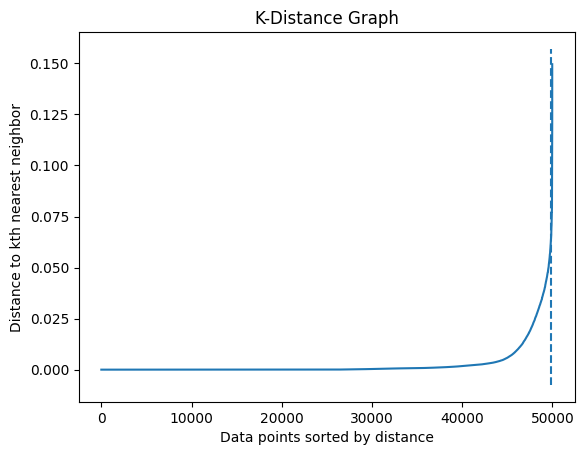

In [2]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

# Compute the distances between all data points
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

# Sort the distances in ascending order and plot the k-distance graph
distances = np.sort(distances[:,1])
knee = KneeLocator(range(len(distances)), distances,curve='convex', direction='increasing')

# Get the optimal eps value from the knee point
eps = distances[knee.knee]
print("Optimal eps value:", eps)

# Plot the k-distance graph with the knee point highlighted
plt.plot(distances)
plt.xlabel("Data points sorted by distance")
plt.ylabel("Distance to kth nearest neighbor")
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title("K-Distance Graph")
plt.show()


In [3]:
len(distances), len(indices), len(data)

(49991, 49991, 49991)

## Feed Into The Model

In [4]:
# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan.fit(data)

# Print the labels
data['label'] = dbscan.labels_

In [5]:
# DBSCAN labels are the cluster labels assigned by the DBSCAN algorithm to each data point in the input dataset. 
# Each data point can either belong to a cluster (identified by a positive integer label) or be identified as an outlier (identified by a label of -1).
data.head()

,0,1,label
0,-0.824356,0.003569,0
1,-0.820929,0.003487,0
2,-0.082629,-0.048166,0
3,-0.821957,0.003512,0
4,0.547093,1.205091,1


In [6]:
abnormal_data = data.loc[data['label'] == -1].shape[0]
normal_data = data.loc[data['label'] != -1].shape[0]
abnormal_data, normal_data

(826, 49165)

In [7]:
data.columns = ['x', 'y', 'label']
data.columns


Index(['x', 'y', 'label'], dtype='object')

## Visualize

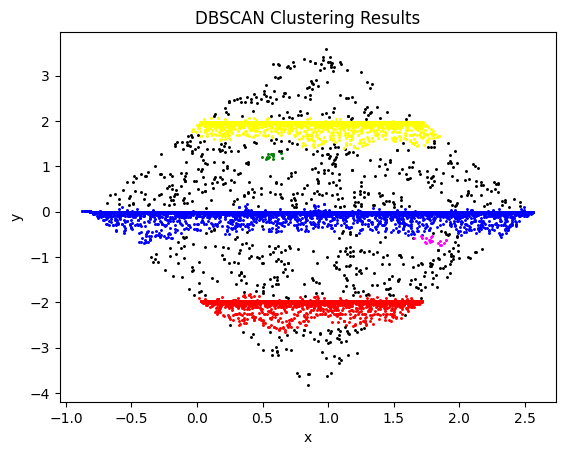

In [8]:
import matplotlib.pyplot as plt

# Define the colors to use for each cluster label
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Get the unique cluster labels
labels = data['label'].unique()

# Plot the data points with different colors for each cluster
for label, color in zip(labels, colors):
    if label == -1:
        # Plot the noise points as black X markers
        plt.scatter(data.loc[data['label'] == label]['x'], data.loc[data['label'] == label]['y'], marker='.', color='black', s=5)
    else:
        # Plot the points for each cluster with a different color and shape
        plt.scatter(data.loc[data['label'] == label]['x'], data.loc[data['label'] == label]['y'], marker='.', color=color, s = 5)

# Set the plot title and axis labels
plt.title('DBSCAN Clustering Results')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

# Result
911 network packets have been identified as abnormal ones and 49080 have been identified as normal ones. The blue, yellow, green, pink, and red clusters indicate normal traffic and black nodes are the abnormal ones.